<a href="https://colab.research.google.com/github/ylfoo/ECE3066/blob/main/Classify_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unfinished debugging!  
## AIS1:	Familiarization with the development toolset for machine learning systems

### Objectives

To analyse the general workflow of a machine learning system.
To develop a machine learning system for classification using Python with Scikit-Learn package.

### Steps of Developing a Classification System

1. Open Jupyter Notebook and create a new notebook (named it as AIS1).
2. Enter the following codes in the new notebook.

#Classification: Iris flowers prediction

First, load the libraries.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier as DTC, plot_tree

Then load the dataset

In [34]:
from sklearn.datasets import load_iris
data = load_iris(as_frame=True)
# Load the Iris dataset as pandas DataFrame

In [39]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [42]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [44]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [45]:
data.data.shape

(150, 4)

In [46]:
data.data.size

600

In [47]:
data.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [49]:
data.target.shape

(150,)

In [50]:
data.target.size

150

In [52]:
# Print the first 5 rows of the dataframe
data.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
# Print any 5 rows of the dataframe
data.data.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
133,6.3,2.8,5.1,1.5
53,5.5,2.3,4.0,1.3
96,5.7,2.9,4.2,1.3
20,5.4,3.4,1.7,0.2
41,4.5,2.3,1.3,0.3


In [54]:
data.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [55]:
data.target.sample(5)

76    1
68    1
22    0
60    1
8     0
Name: target, dtype: int64

In [57]:
data.data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [58]:
data.target.describe()

count    150.000000
mean       1.000000
std        0.819232
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: target, dtype: float64

In [71]:
# https://www.aboutdatablog.com/post/how-to-use-groupby-and-aggregate-functions-in-pandas-for-quick-data-analysis
data.data.groupby(data.target)

In [73]:
# https://www.aboutdatablog.com/post/how-to-use-groupby-and-aggregate-functions-in-pandas-for-quick-data-analysis
data.data.groupby(data.target).size()

target
0    50
1    50
2    50
dtype: int64

In [72]:
# https://www.aboutdatablog.com/post/how-to-use-groupby-and-aggregate-functions-in-pandas-for-quick-data-analysis
data.data.groupby(data.target).mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


Data visualizations

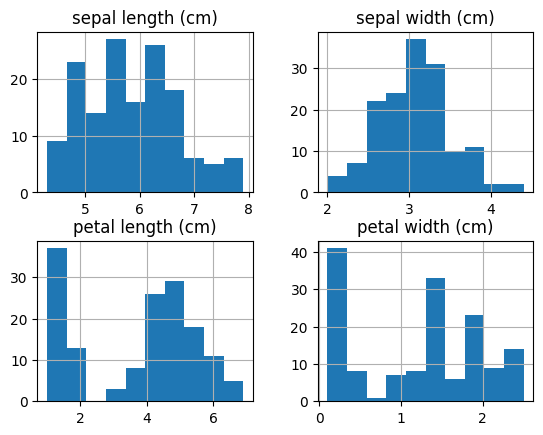

In [76]:
# Histograms
data.data.hist()
plt.show()

In [81]:
# Indexing DataFrame columns by name
data.data['petal length (cm)']

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal length (cm), Length: 150, dtype: float64

Scatter Plot of the Iris dataset

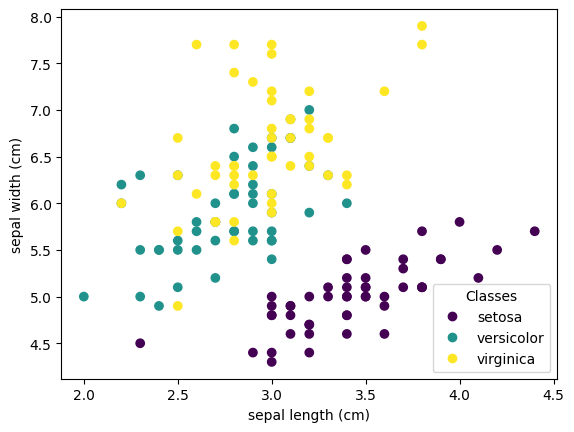

In [82]:
_, ax = plt.subplots()
scatter = ax.scatter(data.data['sepal width (cm)'], data.data['sepal length (cm)'], c=data.target)
ax.set(xlabel=data.feature_names[0], ylabel=data.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], data.target_names, loc="lower right", title="Classes"
)

Prepare the data for training & testing

In [87]:
data.data.values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [88]:
data.target.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [89]:
# Split-out train and test sets
X = data.data.values
y = data.target.values

# array = dataset.values
# X = array[:,0:4]
# y = array[:,4]

test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

3. Use the given dataset, iris.data.csv
4. Check the dimensions of train set (X_train) and test set (X_test). How many data samples are there in the train set and test set?
5. Use k-nearest neighbor (kNN) classifier to perform the classification of the iris flowers.
6. Try with different values of k to obtain the best performance (calculate the accuracy, precision, recall and F1-score).
7. Next, use support vector machine (SVM) classifier to perform the classification.
8. Try with different types of kernel (linear or rbf) and values of  C (0.001, 0.01, 0.1, 1, 10) to obtain the best performance (calculate the accuracy, precision, recall and F1-score).
9. Finally, use decision tree classifier to perform the classification.
10. Try with different values for max_depth (None, 2, 4, 8, 10) to obtain the best performance (calculate the accuracy, precision, recall and F1-score).
11. You are required to submit a lab report to discuss all the observations and results obtained in this experiment (use tables to report the results).

In [ ]:
print(X_train.shape, X_test.shape)

Use k Nearest Neighbors method

In [ ]:
knn = KNC().fit(X_train, y_train)

In [ ]:
print(knn.score(X_test, y_test)) # Warning should be gone after updating the sklearn

Find the best kNN parameters

In [ ]:
print('k-Nearest Neighbours (kNN) Classification')
n_neighbors = list(range(1,11))
knn = KNC().fit(X_train, y_train)
hyperparameters = dict(n_neighbors=n_neighbors)
grid = GridSearchCV(knn, hyperparameters, cv=12)
grid.fit(X, y)
print('Best kNN Parameters:')
print(grid.best_params_)

In [ ]:
print('k-Nearest Neighbours (kNN) using the best parameters:')
knn2 = KNC(**grid.best_params_).fit(X_train, y_train)
print(f'Testing Accuracy: {knn2.score(X_test, y_test)}')
print(f'Training Accuracy: {knn2.score(X_train, y_train)}')
y_pred_knn2 = knn2.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred_knn2))
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred_knn2, labels=class_label)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_label)
disp.plot()
# plt.show()

Now let's try with Support Vector Machine (SVM). Let's start with a linear kernel.

Find the best SVM parameters

In [ ]:
print('Support Vector Machine (SVM)')
svc = SVC().fit(X_train, y_train)
params = dict(kernel= ['rbf','linear'], C=[0.001, 0.01, 0.1, 1, 10], gamma=[0.001, 0.01, 0.1, 1, 10])
grid = GridSearchCV(svc, params, n_jobs=-1, verbose=2)
grid.fit(X, y)
print('Best SVM Parameters:')
print(grid.best_params_)

In [ ]:
print('Support Vector Machine (SVM) using the best parameters:')
svc2 = SVC(**grid.best_params_).fit(X_train, y_train)
print(f'Testing Accuracy: {svc2.score(X_test, y_test)}')
print(f'Training Accuracy: {svc2.score(X_train, y_train)}')
y_pred_svc2 = svc2.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test, y_pred_svc2))
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred_svc2, labels=class_label)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_label)
disp.plot(cmap='magma')
# plt.show()

Now let's try with Decision Tree.

Find the best Decision Tree parameters

In [ ]:
print('Decision Tree')
max_depth = list(range(1,11))
dtc = DTC().fit(X_train, y_train)
hyperparameters = dict(max_depth=max_depth)
grid = GridSearchCV(dtc, hyperparameters, cv=12)
grid.fit(X, y)
print('Best Decision Tree Parameters: ')
print(grid.best_params_)

In [ ]:
print('Decision Tree using best parameters')
dtc2 = DTC(**grid.best_params_).fit(X_train, y_train)
print(f'Testing Accuracy: {dtc2.score(X_test, y_test)}')
print(f'Training Accuracy: {dtc2.score(X_train, y_train)}')
y_pred_dtc2 = dtc2.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred_dtc2))
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, y_pred_dtc2, labels=class_label)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_label)
disp.plot(cmap='plasma')
# plt.show()

Show the tree

In [ ]:
features = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
tree.plot_tree(dtc,
               feature_names = features,
               class_names = class_label,
               filled = True);